# Time SeriesForecasting - Semester End Exam - 100 marks

# Section A Total 20 Marks

#### 1.A Explain the concept of seasonality in time series analysis. How can seasonality be detected and accounted for in a time series model? Provide examples where applicable. (5 Marks)

#### 1.B What are the key differences between the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) in time series analysis? Explain their respective roles in identifying patterns within a time series? (7 Marks)

#### 1.C What is the difference between additive and multiplicative time series models? In what situations would you choose one over the other? Provide examples to illustrate your answer. (8 Marks)

# Section B Total 40 Marks

### Dataset Description

- **Title**: Retail Sales Data for a Store (retail_sales.csv)
- **Description**: A time series dataset representing the daily total sales for a retail store in New York, USA, during the year 1992 to 2016. The dataset includes information on the date and total sales made each day. There are 293 records in total monthly data.
- **Columns**:
  - **ds(date)**: The date of the sales record in "yyyy-mm-dd" format.
  - **y(sales)**: The total sales amount in USD for the corresponding date (numeric).

In [769]:
'''
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from   pandas.tseries.offsets          import BDay
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import  qqplot
from statsmodels.tsa.seasonal          import  seasonal_decompose
from   statsmodels.tsa.api             import  ExponentialSmoothing,Holt
from statsmodels.tsa.arima.model       import  ARIMA
from sklearn.metrics                   import  mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
'''

"\nimport pandas                          as      pd\nimport numpy                           as      np\nimport matplotlib.pyplot               as      plt\nfrom   IPython.display                 import  display\nfrom   pylab                           import  rcParams \nfrom   datetime                        import  datetime, timedelta\nfrom   pandas.tseries.offsets          import BDay\nfrom statsmodels.tsa.stattools         import  adfuller\nfrom statsmodels.tsa.stattools         import  pacf\nfrom statsmodels.tsa.stattools         import  acf\nfrom statsmodels.graphics.tsaplots     import  plot_pacf\nfrom statsmodels.graphics.tsaplots     import  plot_acf\nfrom statsmodels.graphics.gofplots     import  qqplot\nfrom statsmodels.tsa.seasonal          import  seasonal_decompose\nfrom   statsmodels.tsa.api             import  ExponentialSmoothing,Holt\nfrom statsmodels.tsa.arima.model       import  ARIMA\nfrom sklearn.metrics                   import  mean_squared_error\nimport warnings

### 2.A Data preparation (10 marks)

#### a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (2 MARK)

In [772]:
import pandas as pd

In [773]:
df = pd.read_csv('retail_sales.csv')
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [774]:
len(df.columns)

2

In [775]:
len(df.index)

293

In [776]:
# Shape 
print("Number of rows and columns:", df.shape)

Number of rows and columns: (293, 2)


In [777]:
# Data types
df.dtypes

ds    object
y      int64
dtype: object

#### b. convert the data into time series (3 MARK)

In [779]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d', errors='coerce')

In [780]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

#### c. Check for defects in the data such as missing values, null, etc. (2 MARK)

In [782]:
df.isnull().sum()

ds    0
y     0
dtype: int64

#### d. Visualize the time series using relevant plots. (3 MARK)

In [784]:
df.set_index('ds', inplace = True)

In [785]:
df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


<Axes: xlabel='ds'>

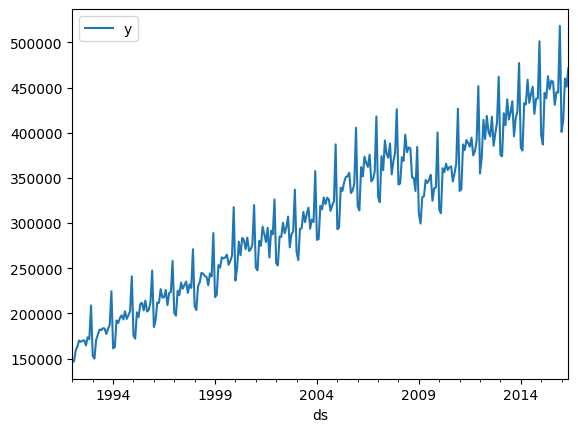

In [786]:
df.plot.line()

In [787]:
import matplotlib.pyplot as plt

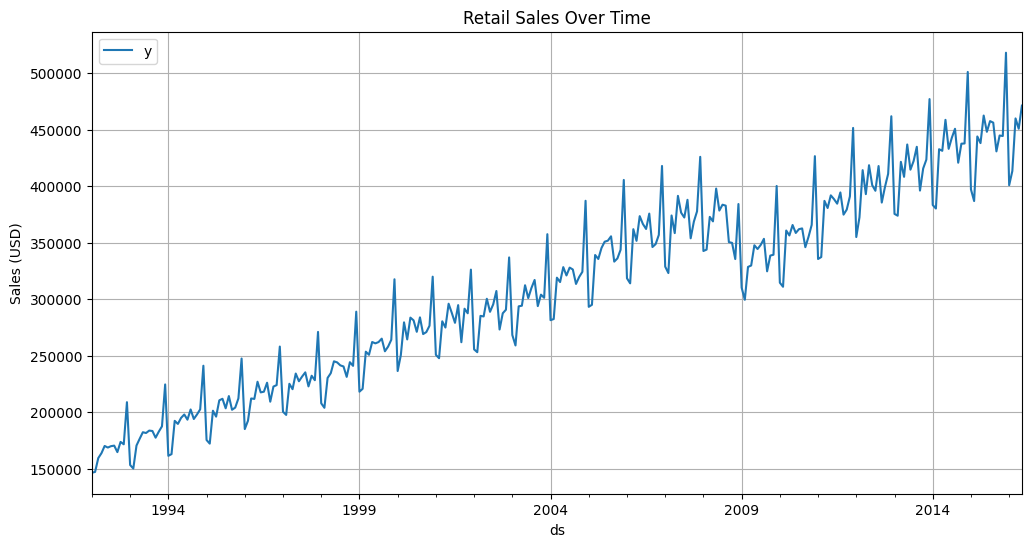

In [788]:
# or
df.plot.line(figsize=(12, 6), title='Retail Sales Over Time', ylabel='Sales (USD)')
plt.grid(True)
plt.show()

### 2.B Data Understanding (15 marks) 

#### a. Decompose the time series and check for components of time series. (4 MARKS)

In [791]:
from statsmodels.tsa.seasonal import seasonal_decompose

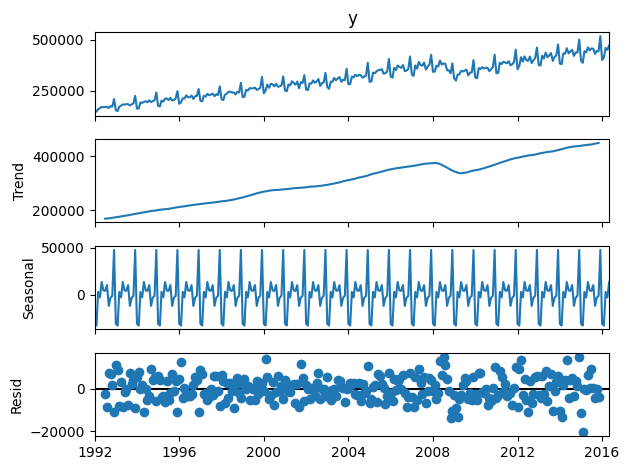

In [792]:
# Decompose using additive model (monthly data → period=12)
decomposition = seasonal_decompose(df['y'], model='additive', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()

#### b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary? (3+2 MARKS)

In [794]:
from statsmodels.tsa.stattools import adfuller

In [795]:
# Run Dickey-Fuller test
result = adfuller(df['y'])

In [796]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -0.6443250505938574
p-value: 0.8606486181958659
Critical Values:
1%: -3.4541800885158525
5%: -2.872031361137725
10%: -2.5723603999791473


In [797]:
'''
Output interpretation:

1. ADF Statistic:
> Value: -0.6443250505938574
> If the ADF statistic is less than the critical value (e.g., at 1%, 5%, or 10%), you reject the null hypothesis.
> Here, ADF Statistic (-0.6443250505938574) > Critical Value at 1% (-3.4541800885158525) → Fail to reject null hypothesis → Series is non-stationary

2. p-value:
> Value: 0.8606486181958659
> less than 0.05 → fail to reject null hypothesis → the series is non-stationary.
'''

'\nOutput interpretation:\n\n1. ADF Statistic:\n> Value: -0.6443250505938574\n> If the ADF statistic is less than the critical value (e.g., at 1%, 5%, or 10%), you reject the null hypothesis.\n> Here, ADF Statistic (-0.6443250505938574) > Critical Value at 1% (-3.4541800885158525) → Fail to reject null hypothesis → Series is non-stationary\n\n2. p-value:\n> Value: 0.8606486181958659\n> less than 0.05 → fail to reject null hypothesis → the series is non-stationary.\n'

In [798]:
# first order differencing
df_diff = df['y'].diff().dropna()

In [799]:
result_diff = adfuller(df_diff)

print('ADF Statistic (Differenced):', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic (Differenced): -3.437937154315162
p-value: 0.009731610960260326
Critical Values:
   1%: -3.4541800885158525
   5%: -2.872031361137725
   10%: -2.5723603999791473


In [800]:
'''
Your ADF Test (After Differencing):

p-value < 0.05
ADF statistic < all critical values

- Your differenced series is now stationary 
'''

'\nYour ADF Test (After Differencing):\n\np-value < 0.05\nADF statistic < all critical values\n\n- Your differenced series is now stationary \n'

#### c. Plot AutoCorrelation and Partial AutoCorrelation function for original series? What is your inference from these plots?  (3+3 MARKS)

In [802]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [803]:
# for original data

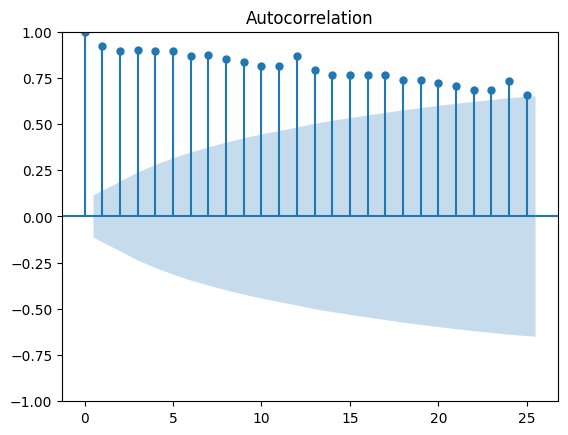

In [804]:
plot_acf(df['y'])
plt.show()

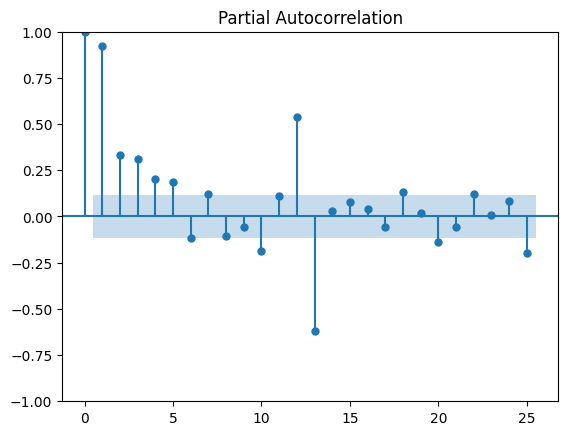

In [805]:
plot_pacf(df['y'])
plt.show()

In [806]:
'''
Inference: original data

ACF Inference – Original Series
> The ACF plot shows a slow, gradual decline over several lags.
This indicates non-stationarity in the time series, likely due to trend or seasonality.
Differencing is needed to stabilize the mean before applying forecasting models like ARIMA.

PACF Inference – Original Series
> The PACF plot shows a strong spike at lag 1, followed by a rapid drop.
This suggests a possible AR(1) component within a non-stationary process.
Differencing is required before finalizing the ARIMA model parameters.
'''

'\nInference: original data\n\nACF Inference – Original Series\n> The ACF plot shows a slow, gradual decline over several lags.\nThis indicates non-stationarity in the time series, likely due to trend or seasonality.\nDifferencing is needed to stabilize the mean before applying forecasting models like ARIMA.\n\nPACF Inference – Original Series\n> The PACF plot shows a strong spike at lag 1, followed by a rapid drop.\nThis suggests a possible AR(1) component within a non-stationary process.\nDifferencing is required before finalizing the ARIMA model parameters.\n'

In [807]:
# for differenced data

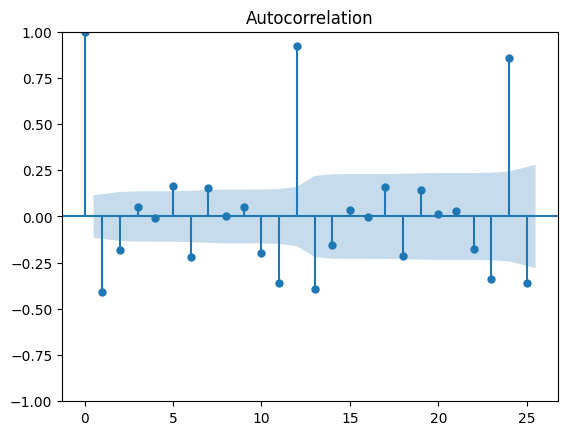

In [808]:
plot_acf(df_diff)
plt.show()

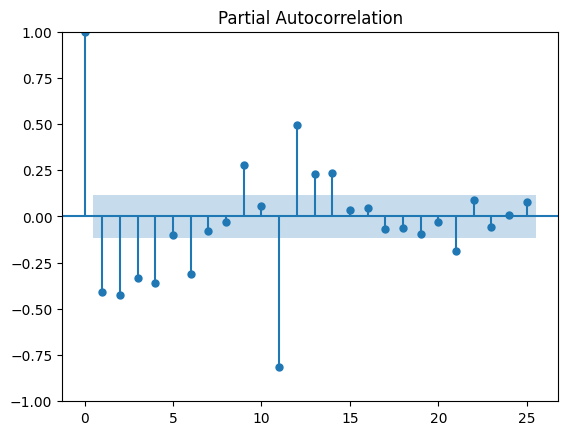

In [809]:
plot_pacf(df_diff)
plt.show()

In [810]:
'''
ACF Inference – Differenced Series
> The ACF plot of the differenced series shows a significant spike at lag 1, followed by rapid decline.
This indicates short-term autocorrelation, supporting a possible MA(1) component.
The sharp drop confirms that the series has been successfully differenced and is now stationary.

PACF Inference – Differenced Series
> The PACF plot of the differenced series shows significant spikes up to lag 5.
This suggests the presence of an AR(5) process in the stationary data.
Therefore, the ARIMA model may be fit with p = 5 and d = 1.
'''

'\nACF Inference – Differenced Series\n> The ACF plot of the differenced series shows a significant spike at lag 1, followed by rapid decline.\nThis indicates short-term autocorrelation, supporting a possible MA(1) component.\nThe sharp drop confirms that the series has been successfully differenced and is now stationary.\n\nPACF Inference – Differenced Series\n> The PACF plot of the differenced series shows significant spikes up to lag 5.\nThis suggests the presence of an AR(5) process in the stationary data.\nTherefore, the ARIMA model may be fit with p = 5 and d = 1.\n'

### 2.C Model Building (15 marks)

#### a. Split dataset into 80-20 train and test sets. (5 marks)

In [813]:
# Reset index to make splitting easy
df_reset = df.reset_index()

# 80-20 split
train_size = int(len(df_reset) * 0.8)
train, test = df_reset[:train_size], df_reset[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 234, Test size: 59


#### b. Fit ARIMA model and observe the RMSE and MAPE values of the model for test data.(10 marks)

In [815]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [816]:
from statsmodels.tsa.arima.model import ARIMA

In [817]:
# Fit ARIMA on training data
model = ARIMA(train['y'], order=(1, 1, 2))
model_fit = model.fit()

# Forecasting for test period
forecast = model_fit.forecast(steps=len(test))

C:\Anaconda\envs\tfenv38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [818]:
rmse = np.sqrt(mean_squared_error(test['y'], forecast))
mape = mean_absolute_percentage_error(test['y'], forecast) * 100

print("RMSE:", rmse)
print("MAPE:", mape, "%")

RMSE: 57020.146007304385
MAPE: 10.69087157749864 %


In [819]:
'''
using our model data: better model
model = ARIMA(train['y'], order=(5, 1, 2))
model_fit = model.fit()

# Forecasting for test period
forecast = model_fit.forecast(steps=len(test))
'''

"\nusing our model data: better model\nmodel = ARIMA(train['y'], order=(5, 1, 2))\nmodel_fit = model.fit()\n\n# Forecasting for test period\nforecast = model_fit.forecast(steps=len(test))\n"

In [820]:
'''
rmse = np.sqrt(mean_squared_error(test['y'], forecast))
mape = mean_absolute_percentage_error(test['y'], forecast) * 100

print("RMSE:", rmse)
print("MAPE:", mape, "%")
'''

'\nrmse = np.sqrt(mean_squared_error(test[\'y\'], forecast))\nmape = mean_absolute_percentage_error(test[\'y\'], forecast) * 100\n\nprint("RMSE:", rmse)\nprint("MAPE:", mape, "%")\n'

# Section C Total 40 Marks

### 3.A Fit exponential smoothing model and observe the residuals, RMSE and MAPE values of the model for test data. (15 MARKS)

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [824]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [825]:
# Fit Holt-Winters model (additive trend and seasonality)
model = ExponentialSmoothing(train['y'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)
hw_fit = model.fit()

# Forecast for test period
hw_forecast = hw_fit.forecast(len(test))

C:\Anaconda\envs\tfenv38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [826]:
# Residuals
residuals = test['y'] - hw_forecast
residuals.head()

234    -6172.026203
235      602.952503
236     5163.103791
237     2029.513957
238    10488.862806
dtype: float64

In [827]:
# RMSE & MAPE
rmse_hw = np.sqrt(mean_squared_error(test['y'], hw_forecast))
mape_hw = mean_absolute_percentage_error(test['y'], hw_forecast) * 100

print("Holt-Winters RMSE:", rmse_hw)
print("Holt-Winters MAPE:", mape_hw, "%")

Holt-Winters RMSE: 15599.23258050406
Holt-Winters MAPE: 3.1399349511177475 %



### 3.B How would you improve the exponential smoothing model? Make the changes and Fit the final exponential smoothing model. (10 MARKS)

In [894]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [896]:
# Improved Holt-Winters model
improved_model = ExponentialSmoothing(train['y'],
                                      trend='add',
                                      seasonal='mul',
                                      seasonal_periods=12)

improved_fit = improved_model.fit()

C:\Anaconda\envs\tfenv38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### 3.B Analyze the residuals of this final model. Feel free to use charts or graphs to explain. (5 MARKS)

In [910]:
# Residuals
improved_residuals = test['y'] - improved_forecast
improved_residuals.head()

234    -5211.498241
235      819.721710
236     7828.006018
237     3587.702646
238    11441.669101
dtype: float64

In [906]:
rmse_imp = np.sqrt(mean_squared_error(test['y'], improved_forecast))
mape_imp = mean_absolute_percentage_error(test['y'], improved_forecast) * 100

print("Improved Model RMSE:", rmse_imp)
print("Improved Model MAPE:", mape_imp, "%")

Improved Model RMSE: 15377.136254050936
Improved Model MAPE: 3.228875161808188 %


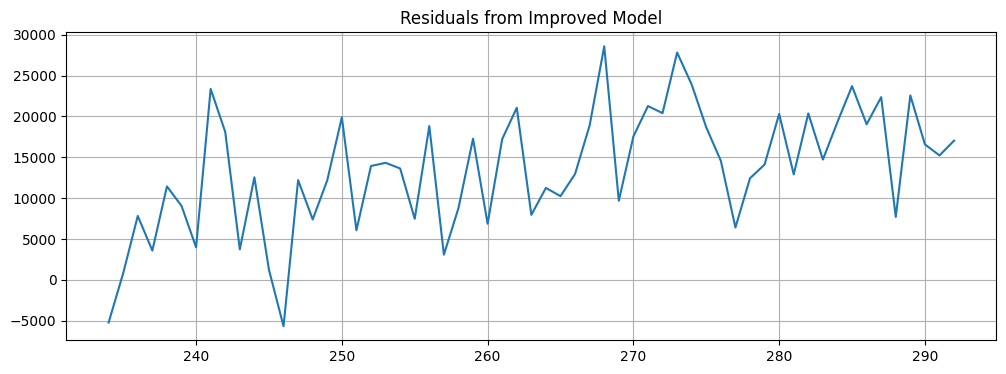

In [924]:
# Residual plot
plt.figure(figsize=(12, 4))
plt.plot(improved_residuals)
plt.title('Residuals from Improved Model')
plt.grid(True)
plt.show()

### 3.C Forecast the sales for next 1 month using the final model?? (10 MARKS)

In [930]:
# Forecast next 30 days using improved model
next_month_forecast = improved_fit.forecast(30)

# Show forecasted values
print("Forecast for next 30 days:\n")
print(next_month_forecast)

Forecast for next 30 days:

234    389811.498241
235    393728.278290
236    367066.993982
237    375776.297354
238    379639.330899
239    442603.234912
240    351061.084236
241    349152.992661
242    396168.264757
243    389299.622226
244    406091.494459
245    399758.428500
246    401693.205354
247    405698.965207
248    378198.882667
249    387143.581898
250    391094.595793
251    455924.879886
252    361601.021555
253    359609.481842
254    408003.238454
255    400900.524755
256    418162.808511
257    411612.125167
258    413574.912467
259    417669.652123
260    389330.771352
261    398510.866441
262    402549.860686
263    469246.524860
dtype: float64


# END